In [ ]:
# packages for data analysis

import numpy as np # number/python array 
import pandas as pd # dataframe more like excel 

from sklearn import svm 


#visual your data
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(font_scale=1.2) # import the font of the sns in our import line

%matplotlib inline # because we are on the webserver it tells to display everything downbelow

In [14]:
recipe = pd.read_csv('cupcakes.csv')

In [15]:
recipe.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


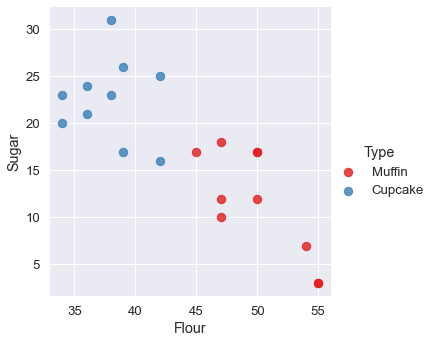

In [16]:
# plot our data 

sns.lmplot('Flour', 'Sugar', data = recipe, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws={"s":70})

In [26]:
# format or pre-process our data 
type_label = np.where(recipe['Type'] == 'Muffin', 0,1)
recipe_features = recipe.columns.values[1:].tolist()
recipe_features
ingredients = recipe[['Flour', 'Sugar']].values
ingredients


array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [30]:
# fit model 
model = svm.SVC(kernel ='linear') # svc is a classifier so it says yes and no, true/faulse svr (regression)
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [40]:
# get the separating hyperlane 
w = model.coef_[0] # 
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0] / w[1])

# plot the parallels to the separating hyperplane that pass trhough the support vectors 
b = model.support_vectors_[0]
yy_down = a *xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a*xx + (b[1] - a * b[0])

C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


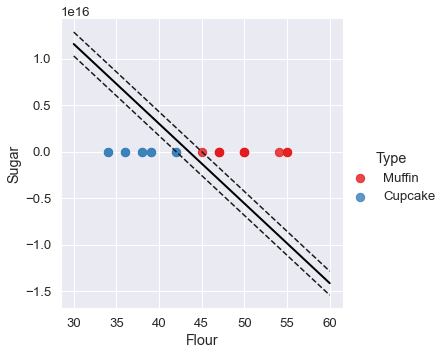

In [41]:
sns.lmplot('Flour', 'Sugar', data=recipe, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [43]:
# create a function to predict muffin or cupcake 

def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')
        
        

# Predict if 50 parts four and 20 parts sugar 
muffin_or_cupcake(10,50)

You're looking at a cupcake recipe!


C:\Users\iulia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


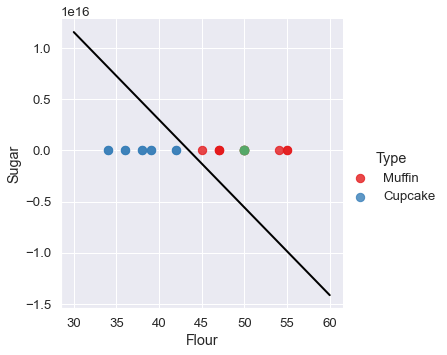

In [44]:
sns.lmplot('Flour', 'Sugar', data=recipe, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth =2, color = 'black')
plt.plot(50,20, 'go', markersize = '9')